In [18]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import data_processing as pf
import altair as alt
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
alt.renderers.enable('default')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [11]:
df = pd.read_csv("tsla_data.csv")
df[2400:]


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mt,Price Change,...,Larry Williams R 10 Day,Larry Williams R 20 Day,AD Oscillator,5 Day CCI,10 Day CCI,20 Day CCI,Day,Month,Year,Days From IPO
2400,2020-01-10,96.358002,96.987999,94.739998,95.629997,64797500,0,0.0,95.785998,-0.006627,...,21.350313,14.185633,0.604093,30.133554,74.851904,101.626368,10,1,2020,3482
2401,2020-01-13,98.699997,105.125999,98.400002,104.972000,132588000,0,0.0,102.832667,0.097689,...,0.623227,0.450317,0.022896,117.768813,118.941678,142.356751,13,1,2020,3485
2402,2020-01-14,108.851997,109.482002,104.980003,107.584000,144981000,0,0.0,107.348668,0.024883,...,6.529975,5.132233,0.421591,110.882193,123.259852,153.715105,14,1,2020,3486
2403,2020-01-15,105.952003,107.568001,103.358002,103.699997,86844000,0,0.0,104.875333,-0.036102,...,22.999226,16.856175,0.918766,49.327110,84.708837,118.959391,15,1,2020,3487
2404,2020-01-16,98.750000,102.891998,98.433998,102.697998,108683500,0,0.0,101.341331,-0.009662,...,30.699630,20.332084,0.043517,-18.773801,39.949969,84.145863,16,1,2020,3488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,2021-03-08,600.549988,620.130005,558.789978,563.000000,51497000,0,0.0,580.639994,-0.058450,...,92.970546,93.050134,0.931366,-84.781918,-131.127524,-134.852119,8,3,2021,3905
2691,2021-03-09,608.179993,678.090027,595.210022,673.580017,67028000,0,0.0,648.960022,0.196412,...,59.907304,59.907304,0.054416,17.433400,-29.012309,-70.287011,9,3,2021,3906
2692,2021-03-10,700.299988,717.849976,655.059998,668.059998,60486700,0,0.0,680.323324,-0.008195,...,61.557781,61.557781,0.792961,57.428626,23.986065,-37.107325,10,3,2021,3907
2693,2021-03-11,699.400024,702.500000,677.179993,699.599976,36106300,0,0.0,693.093323,0.047211,...,52.127379,52.127379,0.114535,79.002814,44.476234,-19.977381,11,3,2021,3908


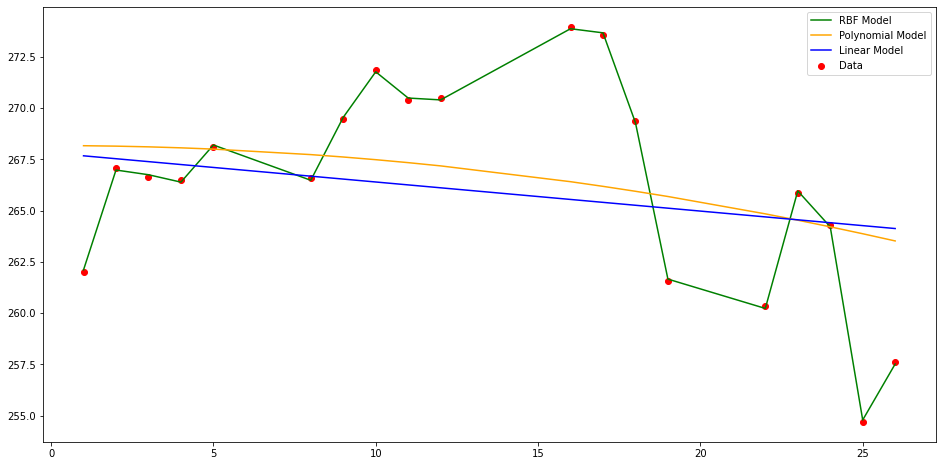

In [3]:
df = pd.read_csv("fb_data.csv")
#print(df.tail())

feb_df = df[2189:2208]
days = list()
adj_close_prices = list()

df_days = feb_df.loc[:, 'Date']
df_adj_close = feb_df.loc[:, 'Close']

for day in df_days:
    days.append([int(day.split('-')[2])]  )

for close in df_adj_close:
    adj_close_prices.append( float(close))

#print(days)
#print(adj_close_prices)

lin_svr = SVR(kernel = 'linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

pol_svr = SVR(kernel = 'poly', C=1000.0, degree=2)
pol_svr.fit(days,adj_close_prices)

rbf_svr = SVR(kernel = 'rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, rbf_svr.predict(days),color='green',label = 'RBF Model')
plt.plot(days, pol_svr.predict(days),color='orange',label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days),color='blue',label = 'Linear Model')

plt.legend()
plt.show()

In [17]:
days = [[26]]

print('The RBF SVR predicted: ', rbf_svr.predict(days))
print('The Linear SVR predicted: ', lin_svr.predict(days))
print('The Polynomial SVR predicted: ', pol_svr.predict(days))


The RBF SVR predicted:  [257.52001445]
The Linear SVR predicted:  [264.12624893]
The Polynomial SVR predicted:  [263.52166318]


In [21]:
print('The actual price: ', actual_price['Close'])

The actual price:  2207    257.619995
Name: Close, dtype: float64


In [2]:
googl = yf.Ticker('GOOGL')
amzn = yf.Ticker('AMZN')
aapl = yf.Ticker('AAPL')
fb = yf.Ticker('FB')
msft = yf.Ticker('MSFT')
tsla = yf.Ticker('TSLA')

aapl_df = aapl.history(period='max')
amzn_df = amzn.history(period='max')
fb_df = fb.history(period='max')
googl_df = googl.history(period='max')
msft_df = msft.history(period='max')
tsla_df = tsla.history(period='max')

In [48]:
stock_dfs = [amzn_df]

for stock_df in stock_dfs:
    stock_df = pf.date_time_prep(stock_df) 
    stock_df = pf.rolling_aves(stock_df)
    stock_df = pf.future_close_setup(stock_df, 1)

In [4]:
def combiner(stock_dfs):
    combine_df = stock_dfs[0]
    i = 1
    while i < len(stock_dfs):
        combine_df = pd.concat([combine_df, stock_dfs[i]])
        i += 1
    
    combine_df.sort_values(by=['Date'], inplace=True)
    return combine_df

In [106]:
combine_df = combiner(stock_dfs)
X = combine_df.iloc[:,:-1]
y = combine_df.iloc[:,-1:]

days = list()
adj_close_prices = list()
#df_days = combine_df.iloc[:,:-1,]
#df_adj_close = combine_df.iloc[:,-1:]
#df_days
X = X[:5998]
y = y[:5998]



,Close in 1 Days
Date,
1997-05-15,1.729167
1997-05-16,1.708333
1997-05-19,1.635417
1997-05-20,1.427083
1997-05-21,1.395833
...,...
2021-03-10,3113.590088
2021-03-11,3089.489990
2021-03-12,3081.679932


In [97]:
from sklearn.model_selection import train_test_split

split_mark = int(len(combine_df)-(365*len(stock_dfs)))
X_train = X.head(split_mark)
X_test = X.tail(len(combine_df) - split_mark)
y_train = y.head(split_mark)
y_test = y.tail(len(combine_df) - split_mark)

#df_days = combine_df.iloc[:,:-1]
#df_adj_close = combine_df.iloc[:,-1:]

X_train
X_test



,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,...,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,1726.020020,1740.579956,1719.229980,1739.650024,2471900,0,0.0,4,10,2019,...,1785.595502,1795.268994,1766.260498,1781.534003,3091190.0,1859.717783,1869.460923,2323.964852,1943.328054,7.123314e+11
2019-10-07,1731.630005,1747.829956,1723.699951,1732.660034,2154700,0,0.0,7,10,2019,...,1780.127002,1790.160492,1761.214996,1776.599506,3048950.0,1821.944114,1806.113095,2218.844638,1914.330475,7.539775e+11
2019-10-08,1722.489990,1727.000000,1705.000000,1705.510010,2542000,0,0.0,8,10,2019,...,1775.114001,1785.219989,1756.197998,1770.847504,3045355.0,1872.079198,1917.622332,2254.330011,2037.348257,7.573511e+11
2019-10-09,1719.609985,1729.949951,1714.359985,1721.989990,2043500,0,0.0,9,10,2019,...,1770.487500,1780.046484,1751.462000,1765.797504,3025890.0,1936.163190,1927.433772,2179.596220,1995.256643,7.883967e+11
2019-10-10,1725.239990,1738.290039,1713.750000,1720.260010,2575200,0,0.0,10,10,2019,...,1764.867999,1774.277985,1745.435498,1759.633002,3013475.0,1781.545460,1710.390483,1871.445942,1758.665812,7.963505e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-11,3104.010010,3131.780029,3082.929932,3113.590088,2770800,0,0.0,11,3,2021,...,3150.456982,3183.685999,3103.291504,3139.507471,3597565.0,9815.957387,9601.222861,13599.249133,12776.055919,9.111474e+11
2021-03-12,3075.000000,3098.979980,3045.500000,3089.489990,2418500,0,0.0,12,3,2021,...,3139.606982,3174.034998,3093.163501,3130.875476,3603700.0,8981.201405,9280.240371,12615.768864,12074.819208,8.958898e+11
2021-03-15,3074.570068,3082.239990,3032.090088,3081.679932,2913600,0,0.0,15,3,2021,...,3130.835486,3164.134497,3083.102502,3121.073975,3632915.0,8506.421346,9039.455292,11718.990382,11021.741559,8.376434e+11


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_test = scaler.fit_transform(y_test)
y_train = scaler.fit_transform(y_train)

In [63]:
X_train
y_train
X_test
y_test

,Close in 1 Days
Date,
2009-02-17,62.349998
2012-08-01,230.809998
2001-12-20,10.000000
2016-02-16,534.099976
2009-05-05,81.989998
...,...
2007-10-22,100.820000
2006-01-24,43.599998
2006-07-18,34.480000


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [58]:
y_test.dropna()
y_train.dropna()
X_train.dropna()
X_test.dropna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,...,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-15,88.279999,89.529999,86.260002,86.400002,6871600,0,0.0,15,8,2008,...,77.903499,80.371000,76.704501,78.767000,9801750.0,32.407698,38.436498,32.538786,34.782636,4.540932e+13
2014-05-14,302.500000,304.640015,296.660004,297.619995,3323300,0,0.0,14,5,2014,...,309.061003,313.123502,303.576503,308.857498,5523320.0,178.010711,188.121820,185.243348,198.603290,1.300832e+13
2003-03-14,24.540001,24.900000,24.200001,24.709999,8907800,0,0.0,14,3,2003,...,21.924000,22.419500,21.686500,22.251000,5914980.0,1.037274,1.118125,1.045583,1.123099,3.096531e+12
2001-04-27,15.720000,15.730000,15.020000,15.270000,4446000,0,0.0,27,4,2001,...,13.093000,13.752000,12.437000,13.039000,9377925.0,8.548211,9.414506,8.139761,8.905070,2.936934e+13
2008-10-20,52.169998,53.099998,49.910000,52.970001,8452100,0,0.0,20,10,2008,...,62.806000,65.674000,59.422500,62.104001,12303575.0,68.753103,49.043140,66.505289,60.929873,1.536891e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-04-22,14.580000,14.850000,14.150000,14.310000,5290300,0,0.0,22,4,2002,...,14.079000,14.482000,13.709500,14.039000,5151520.0,0.383569,0.359506,0.343345,0.312869,1.489372e+12
2020-06-02,2467.000000,2473.530029,2445.310059,2472.409912,2529900,0,0.0,2,6,2020,...,2407.228015,2431.956006,2383.231006,2411.255017,3671905.0,2201.008715,2148.865018,2158.369579,2008.966686,5.317011e+11
2009-05-06,82.879997,83.599998,79.660004,81.989998,8604000,0,0.0,6,5,2009,...,79.560000,81.084000,78.161001,79.597500,8861450.0,6.785766,7.678983,5.336459,5.352198,1.624403e+13


In [107]:
svr_rbf = SVR(kernel='rbf', C=1e6, gamma=1e-8,epsilon=0.1) 
#pol_svr = SVR(kernel = 'poly', C=1000.0, degree=10)
svr_rbf.fit(X_train,y_train)
#pol_svr.fit(X_train,y_train)
svr_close_pred = svr_rbf.predict(X_test)
svr_train_pred = svr_rbf.predict(X_train)

#pol_close_pred = pol_svr.predict(X_test)
#pol_train_pred = pol_svr.predict(X_train)

/home/matthewarinanta/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [108]:
train_score = r2_score(y_train, svr_train_pred)
print("Training R2 Score: " + str(train_score))
svr_close_pred


Training R2 Score: 0.9999999561591761


array([307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43546423,
       307.43546423, 307.43546423, 307.43546423, 307.43

In [100]:
model_score = r2_score(y_test.dropna(), svr_close_pred[:len(y_test.dropna())])

print("R2 Score: " + str(model_score))

R2 Score: -14.08724967987583


In [90]:
columns = ['Amazon Price', 'Amazon Prediction']

single_split_mark = int(len(stock_dfs[0])-365)
results_df = pd.DataFrame(columns=columns, index=stock_dfs[0].tail(len(stock_dfs[0])-single_split_mark).index)

i = 0
for stock_df in stock_dfs:
    single_split_mark = int(len(stock_df)-365)
    results_df[columns[i]] = stock_df.iloc[:,-1:].tail(len(stock_df) - single_split_mark)
    results_df[columns[i+1]] = svr_rbf.predict(stock_df.iloc[:,:-1].tail(len(stock_df) - single_split_mark))
    i += 2
        
results_df.reset_index(inplace=True)
results_df = results_df.melt('Date', var_name='Company', value_name='Price')
# Plots Results
line_plot = alt.Chart(results_df).mark_line().encode(
    x = 'Date',
    y = 'Price',
    color = 'Company'
    )

line_plot

alt.Chart(...)

In [91]:
results_df

,Date,Company,Price
0,2019-10-04,Amazon Price,1732.660034
1,2019-10-07,Amazon Price,1705.510010
2,2019-10-08,Amazon Price,1721.989990
3,2019-10-09,Amazon Price,1720.260010
4,2019-10-10,Amazon Price,1731.920044
...,...,...,...
725,2021-03-11,Amazon Prediction,155.615848
726,2021-03-12,Amazon Prediction,155.615848
727,2021-03-15,Amazon Prediction,155.615848
728,2021-03-16,Amazon Prediction,155.615848
